In [1]:
!nvidia-smi
import seaborn as sns
sns.set()

Sun Jan 26 18:07:21 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.33.01    Driver Version: 440.33.01    CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce RTX 208...  On   | 00000000:1A:00.0 Off |                  N/A |
| 30%   36C    P2    59W / 250W |   9891MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce RTX 208...  On   | 00000000:1B:00.0 Off |                  N/A |
| 31%   49C    P2    79W / 250W |   9909MiB / 11019MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   2  G

In [2]:
from tensorflow.keras.models import load_model
from scipy import stats
import tensorflow as tf
import math
import itertools
import operator
from tensorflow.python.keras import backend as k
from tqdm import tqdm, tqdm_notebook, notebook
import numpy as np
from tensorflow.keras import layers
import os
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import random
from random import choice
import re

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pickle

from sklearn.preprocessing import LabelEncoder
from bio import AlignIO
# from Bio.Align import MultipleSeqAlignment
# from Bio.SeqRecord import SeqRecord
# from Bio import SeqIO
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from keras_preprocessing import sequence
import sklearn
import numpy as np
import re
import pickle
import itertools
import random
import string
from joblib import dump, load

%precision 2

# os.environ["CUDA_VISIBLE_DEVICES"]="8"
context_length = 15
val_loss_hist = []

# K.clear_session()
# keras.backend.clear_session()

ancName = '_HPGPNRMPC'
desName = 'hg38'

anc = str(np.load('prepData/insert2Anc_{}_hg38_chr3.npy'.format(ancName)))[:10000000]
des = str(np.load('prepData/insert2Des_{}_hg38_chr3.npy'.format(ancName)))[:10000000]
anc = np.array(list(anc+'0'))
des = np.array(list(des+'0'))

# with open('label_encoder.pickle', 'rb') as f:
#     label_encoder = pickle.load(f)
# with open('onehot_encoder.pickle', 'rb') as f:
#     onehot_encoder = pickle.load(f)

label_encoder = load('label_encoder.joblib') 
onehot_encoder = load('onehot_encoder.joblib') 

integer_encoded_des = label_encoder.transform(des)
integer_encoded_anc = label_encoder.transform(anc)
integer_des = integer_encoded_des.reshape(len(integer_encoded_des), 1)
encoded_des =onehot_encoder.transform(integer_des)
integer_anc = integer_encoded_anc.reshape(len(integer_encoded_anc), 1)
encoded_anc = onehot_encoder.transform(integer_anc)

print(encoded_des)
print(encoded_anc)

print(len(encoded_des[0]))
encode_dimension= len(encoded_des[0])

print(label_encoder.inverse_transform(range(encode_dimension)))
print(onehot_encoder.transform(np.ones(1).reshape(-1,1)))
key = list(label_encoder.inverse_transform(range(encode_dimension)))

nucleotide = label_encoder.inverse_transform(range(encode_dimension))

/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mcb/users/dlim63/miniconda3/envs/research/lib/python3.7/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", n

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
86
['!' '"' '$' '%' '&' '(' ')' '*' '+' '-' '.' '/' '0' '1' '2' '3' '4' '5'
 '6' '7' '8' '9' ':' ';' '<' '=' '>' '?' '@' 'A' 'B' 'C' 'D' 'E' 'F' 'G'
 'H' 'I' 'J' 'K' 'L' 'M' 'N' 'P' 'Q' 'R' 'S' 'T' 'U' 'V' 'W' 'X' 'Y' 'Z'
 '[' '\\' ']' '^' '_' '`' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'i' 'j' 'l' 'm'
 'n' 'o' 'p' 'q' 's' 't' 'u' 'w' 'x' 'z' '{' '|' '}' '~']
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [3]:
# def splice(input, pad):
#     result = []
#     if pad == False:
#         for i in tqdm(range(len(input)-seq_length-1)):
#             result.append(input[i:i+seq_length])
#     else :
#         for i in range(len(input)-seq_length-1):
#             # print(len(input)-seq_length-1)
#             # print(np.concatenate((onehot_encoder.transform(np.ones(1).reshape(-1,1)), 
#             #                              input[i:i+seq_length-1]), 
#             #                              axis = 0))
#             result.append(np.concatenate((onehot_encoder.transform(np.ones(1).reshape(-1,1)), 
#                                          input[i:i+seq_length-1]), 
#                                          axis = 0)
#                          )
#     return np.array(result)
                          
# sliced_anc = splice(encoded_anc, False)

In [4]:
def decode_sequence(input_seq, model, encoder_model, decoder_model):
    length = len(input_seq)
    nucleotide = label_encoder.inverse_transform(range(encode_dimension))
    index = 0
    initial_context = np.expand_dims(input_seq[0: context_length], axis=0)
    states_value = encoder_model.predict(initial_context)
    target_seq = np.zeros((1, 1, encode_dimension*2))
    target_seq[0][0]= np.hstack((input_seq[0], onehot_encoder.transform(np.ones(1).reshape(-1,1))[0]))
    decoded_seq = ''
    for i in tqdm(range(1, length)):
        if i%context_length == 0 :
            context = np.expand_dims(input_seq[i: i+context_length], axis=0)
            states_value = encoder_model.predict(context)
            
#         stop_condition = False
        
#         while not stop_condition:
        output_tokens, h, c = decoder_model.predict(
            [target_seq] + states_value)
        sampled_token_index = np.random.choice(encode_dimension, 1, p=output_tokens[0, -1, :])[0]
        sampled_nucleotide = nucleotide[sampled_token_index]

        if (sampled_nucleotide == '') or (not sampled_nucleotide.isprintable()) or (sampled_nucleotide.isspace()):
            decoded_seq += '0'
        else :
            decoded_seq += sampled_nucleotide
#         if (len(decoded_seq) == context_length):
#             break

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1, 1, encode_dimension*2))
        temp = np.zeros((encode_dimension))
        temp[sampled_token_index] = 1
        target_seq[0][0]= np.hstack((input_seq[i], temp))
        
        if i == length -1:
            output_tokens, h, c = decoder_model.predict(
                [target_seq] + states_value)
            sampled_token_index = np.random.choice(encode_dimension, 1, p=output_tokens[0, -1, :])[0]
            sampled_nucleotide = nucleotide[sampled_token_index]

            decoded_seq += sampled_nucleotide
            

        # Update states
        states_value = [h, c]

    return decoded_seq


model = load_model("models/insert2_{}_hg38_{}_hg38_10.h5".format(ancName, ancName))
encoder_model = load_model("models/E_insert2_{}_hg38_{}_hg38_10.h5".format(ancName, ancName))
decoder_model = load_model("models/D_insert2_{}_hg38_{}_hg38_10.h5".format(ancName, ancName))
decoded_seq = decode_sequence(encoded_anc, model, encoder_model, decoder_model)
print(decoded_seq)

KeyboardInterrupt: 

In [ ]:
np.save('simulated_{}.npy'.format(ancName), decoded_seq)
print(len(encoded_anc))
for i in range(2000):
    print(anc[i], des[i], decoded_seq[i])

In [3]:
def load_seq(chromList):
    inputAll = ''
    predAll = ''
    outputAll = ''
    for chromosome in chromList:
        try:
            inputAll += str(np.load('prepData/insert2Anc_{}_hg38_chr{}.npy'.format(ancName,chromosome)))#[:10000000]
            outputAll += str(np.load('prepData/insert2Des_{}_hg38_chr{}.npy'.format(ancName,chromosome)))#[:10000000]
            predAll += str(np.load('prepData/simulated_{}_-1_chr{}.npy'.format(ancName, chromosome)))#[:10000000]
        except FileNotFoundError:
            print(chromosome)
            continue
        print(len(inputAll), len(outputAll), len(predAll))
        print(inputAll[-10:], outputAll[-10:], predAll[-10:])
    return [inputAll], [outputAll], [predAll]

# def load_seq(chromList):
#     inputAll = ''
#     predAll = ''
#     outputAll = ''
#     for chromosome in chromList:
#         inputAll += str(np.load('prepData/insert2Anc_{}_hg38_chr{}.npy'.format(ancName,chromosome)))[:10000000]
#         outputAll += str(np.load('prepData/insert2Des_{}_hg38_chr{}.npy'.format(ancName,chromosome)))[:10000000]
#         predAll += str(np.load('simulated_{}_10000000_chr{}.npy'.format(ancName, chromosome)))[:10000000]
#     return [inputAll], [outputAll], [predAll]
    
mut_dict = np.load('mut_dict_insert2.npy',allow_pickle=True).item()
inv_dict = {v: k for k, v in mut_dict.items()}
print(inv_dict)

inputAll, outputAll, predAll = load_seq([1,3,4,5,6,7,8,9,12,14,15,16,17,19])
# decoded_seq = str(np.load('simulated_{}_10000000_chr{}.npy'.format(ancName, chromosome)))
# inputAll =[''.join(anc)[:-1]]
# predAll = [decoded_seq[:-1]]
# outputAll = [''.join(des)[:-1]]
lstm_inputAll = [''.join(anc)[:2000000]]
lstm_predAll = [str(np.load('simulated_{}_lstm.npy'.format(ancName)))]
lstm_outputAll = [''.join(des)[:2000000]]
contextLen = 2
numBin = 10
def contextMut(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont = list(itertools.product('ACGT', repeat=size))
    cont1 = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont1:
        for j in cont1:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)-5):
            if a[i+size:i+size+len(ancNuc)] == ancNuc :
                count_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)-5):
            if a[i+size:i+size+len(ancNuc)] == ancNuc and b[i+size+int(len(ancNuc)/2)] == desNuc:
                context_dict[(a[i:i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def contextMutInsert(size, ancNuc, desNuc, anc, des, pred, evol, lstm = False):
    cont1 = list(itertools.product('ACGT', repeat=size-1))
    cont = list(itertools.product('ACGT', repeat=size))
    context_dict = {}
    count_dict = {}
    for i in cont:
        for j in cont:
            #context_dict[(''.join(i)+'A'+''.join(j) , ''.join(i)+'G'+''.join(j))] = 0
            context_dict[(''.join(i)+ancNuc+''.join(j))] = 0
            count_dict[(''.join(i)+ancNuc+''.join(j))] = 0
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)-5):
            count_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for a,b in zip(anc, des):
        for i in range(len(a)-size*2-len(ancNuc)-5):
            inserted_nuc = inv_dict[b[i+size+int(len(ancNuc)/2)-1]]
            if len(inserted_nuc) >1 and inserted_nuc[1] == desNuc:
                context_dict[(a[i:i+size]+ancNuc+a[i+size+len(ancNuc):i+size*2+len(ancNuc)])] += 1
    for key in context_dict.keys():
        if count_dict[key] !=0:
            context_dict[key] = context_dict[key]/count_dict[key] 
        else :
            continue
    sorted_context = sorted(context_dict.items(), key=operator.itemgetter(1), reverse = 1)
    sorted_context = dict(sorted_context)
    if lstm ==False:
        if pred == True and evol ==False:
            np.save('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == True and evol == True:
            np.save('data/pred_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==False:
            np.save('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred == False and evol ==True:
            np.save('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        return sorted_context
    elif lstm ==True :
        if pred == True:
            np.save('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
        elif pred ==False:
            np.save('data/true_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), sorted_context)
    return sorted_context
            
def decodeList(inputAll, predAll, outputAll):
    inp =[]
    inp2 = []
    pre = []
    out = []
    for i, p, o in tqdm(zip(inputAll, predAll, outputAll)):
        input, pred = decodeDictSeq(i, p, mut_dict)
        input2, output = decodeDictSeq(i,o, mut_dict)
        inp.append(input)
        inp2.append(input2)
        pre.append(pred)
        out.append(output)
    return inp, inp2, pre, out

def valueFloat(data_list):
    newDict = dict(zip(data_list.keys(), [float(value) for value in data_list.values()]))
    return newDict
def plotPointMut(n_groups,ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    true = list(trueSeq.values())[:n_groups]
    true_context = list(trueSeq.keys())[:n_groups]
    pred = []
    evol = []
    lstm = []
    for i in true_context:
        pred.append(predSeq[i])
#         evol.append(evolSeq[i])
        lstm.append(lstmSeq[i])

    # create plot
    fig, ax = plt.subplots(figsize=(20, 10))
    index = np.arange(n_groups)
    bar_width = 0.05
    opacity = 0.8

    rects1 = plt.bar(index, pred, bar_width,
    alpha=opacity,
    color='b',
    label='seq2seq_pred')
    
    rects2 = plt.bar(index + bar_width, lstm, bar_width,
    alpha=opacity,
    color='m',
    label='lstm_pred')
    
    rects3 = plt.bar(index + bar_width*2, true, bar_width,
    alpha=opacity,
    color='g',
    label='true')
    
#     rects3 = plt.bar(index + bar_width*3, evol, bar_width,
#     alpha=opacity,
#     color='r',
#     label='evol_pred')

    plt.xlabel('context')
    plt.ylabel('rate')
    plt.title('{} to {} point mutation'.format(ancNuc, desNuc))
    plt.xticks(index + bar_width, list(trueSeq.keys())[:n_groups])
    plt.legend()

    #plt.tight_layout()
    plt.show()
    plt.close()

def plotScatter(n_groups, ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()
    
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()

    true = list(trueSeq.values())
    true_context = list(trueSeq.keys())
    pred = []
    evol = []
    lstm = []
    for i in true_context:
        pred.append(predSeq[i])
#         evol.append(evolSeq[i])
        lstm.append(lstmSeq[i])
    f, (ax1, ax3) = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(10,7))
    f.text(0.5, 0.15, 'True', ha='center', va='center')
    f.text(0.05, 0.5, 'Predicted', ha='center', va='center', rotation='vertical')
    ax1.scatter(true, pred, color = 'm', label = 'RNNEvolver')

    ax1.axis('scaled')
    ax1.axis('square')
    ax1.set_title('{} to {} point mutation'.format(ancNuc, desNuc))
    for i, txt in enumerate(list(trueSeq.keys())):
        if i%20 == 0:
            ax1.annotate(txt, (true[i], pred[i]))

    ax1.legend()
    
    
    ax3.scatter(true, lstm, color = 'c', label = 'lstm')
    for i, txt in enumerate(list(lstmSeq.keys())):
        if i%20 == 0:
            ax3.annotate(txt, (true[i], lstm[i]))

    ax3.axis('scaled')
    ax3.axis('square')
    ax3.legend()
    ax3.set_title('{} to {} point mutation'.format(ancNuc, desNuc))
    f.savefig('figures/scatter_{}_{}_{}->{}.png'.format(ancName, desName,  ancNuc, desNuc))
    f.show()
    plt.show()
    plt.close()
    print(stats.pearsonr(pred, true), stats.pearsonr(lstm, true))
            

# np.save('inputAll_{}_{}'.format(ancName, desName), inputAll)
# np.save('predAll_{}_{}'.format(ancName, desName), predAll)
# np.save('outputAll_{}_{}'.format(ancName, desName), outputAll)

{'A': 'A', 'C': 'C', 'G': 'G', 'T': 'T', '-': '-', '0': '0', '^': 'AAA', 'f': 'AAC', '4': 'AAT', 'B': 'AAG', 'w': 'ACA', 't': 'ACC', 'i': 'ACT', 'e': 'ACG', '.': 'ATA', 'c': 'ATC', '>': 'ATT', 'X': 'ATG', '5': 'AGA', '|': 'AGC', '[': 'AGT', 's': 'AGG', 'u': 'CAA', '(': 'CAC', '=': 'CAT', 'q': 'CAG', 'W': 'CCA', '_': 'CCC', '!': 'CCT', '{': 'CCG', '1': 'CTA', 'Q': 'CTC', 'U': 'CTT', 'b': 'CTG', 'M': 'CGA', ';': 'CGC', 'm': 'CGT', '~': 'CGG', 'a': 'TAA', ']': 'TAC', '&': 'TAT', ')': 'TAG', '7': 'TCA', '6': 'TCC', 'p': 'TCT', '%': 'TCG', 'n': 'TTA', 'P': 'TTC', 'F': 'TTT', 'h': 'TTG', '3': 'TGA', ':': 'TGC', 'z': 'TGT', '8': 'TGG', 'R': 'GAA', 'S': 'GAC', '/': 'GAT', 'j': 'GAG', 'o': 'GCA', 'd': 'GCC', '@': 'GCT', 'L': 'GCG', '}': 'GTA', 'H': 'GTC', 'Y': 'GTT', 'x': 'GTG', '"': 'GGA', 'I': 'GGC', '\\': 'GGT', 'J': 'GGG', '9': 'AA', '`': 'AC', 'l': 'AT', '<': 'AG', 'N': 'CA', 'V': 'CC', 'D': 'CT', '+': 'CG', 'E': 'TA', 'Z': 'TC', '$': 'TT', '?': 'TG', '2': 'GA', 'K': 'GC', '*': 'GT', 'g': 

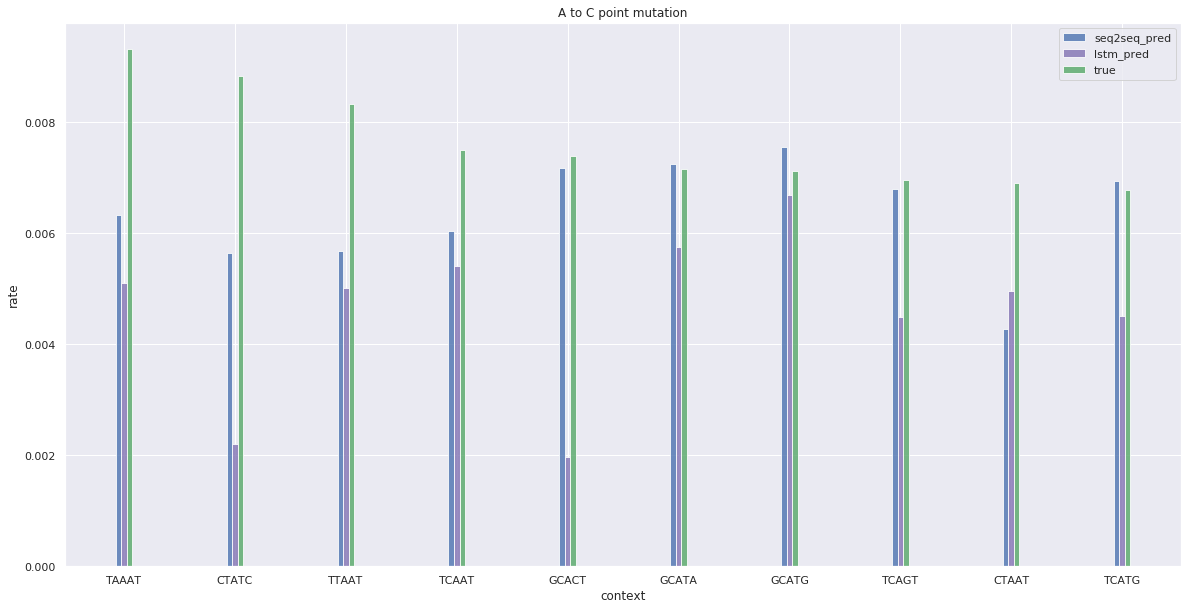

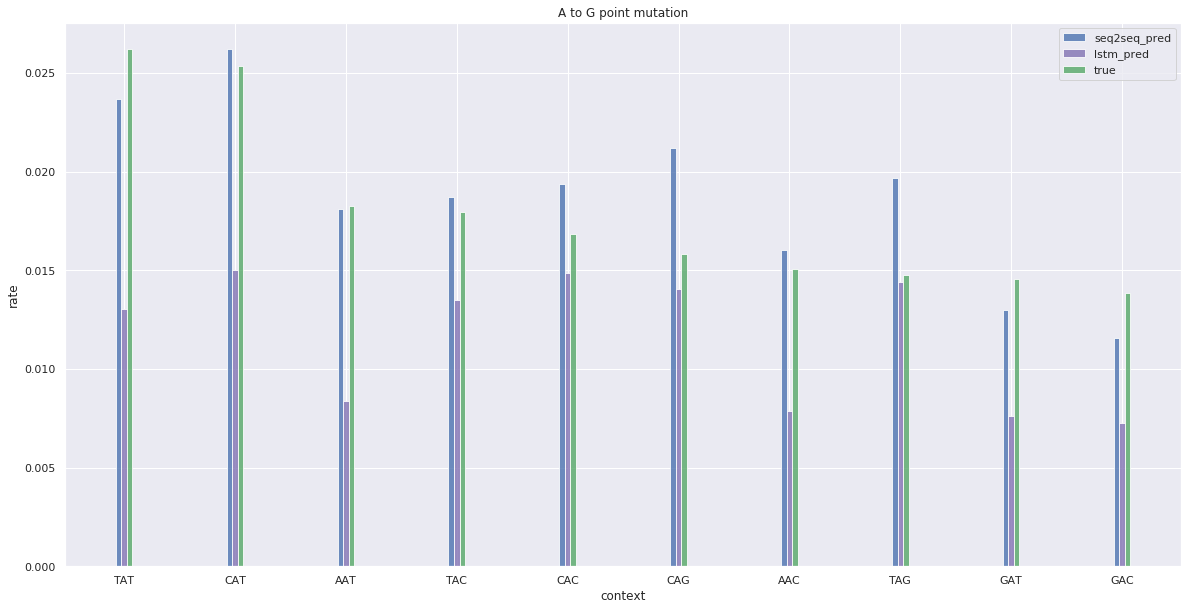

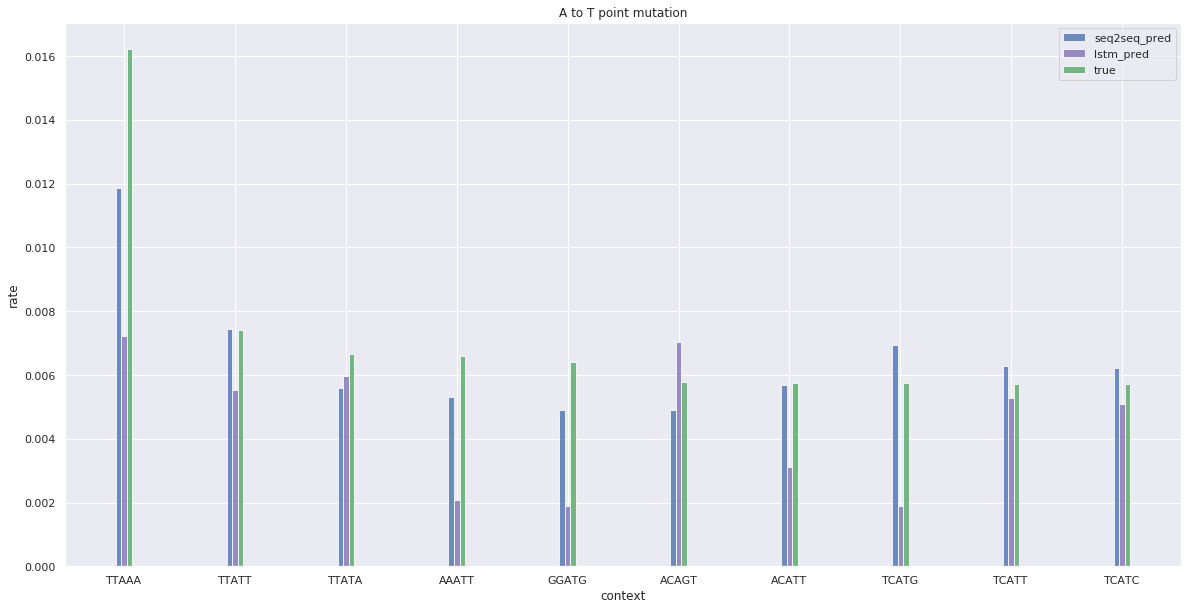

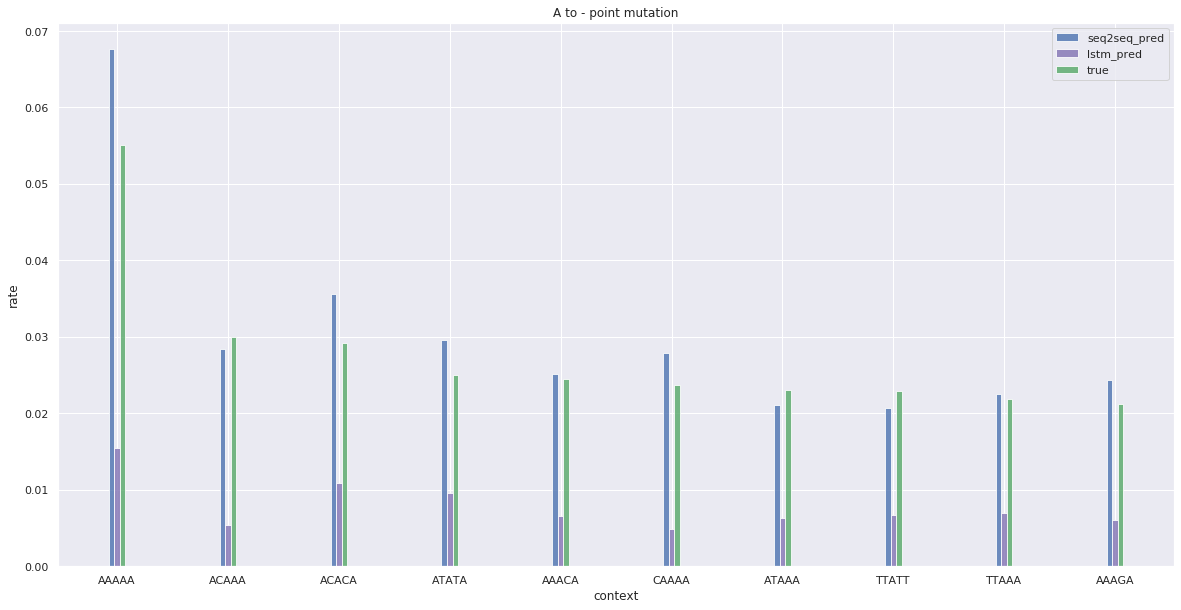

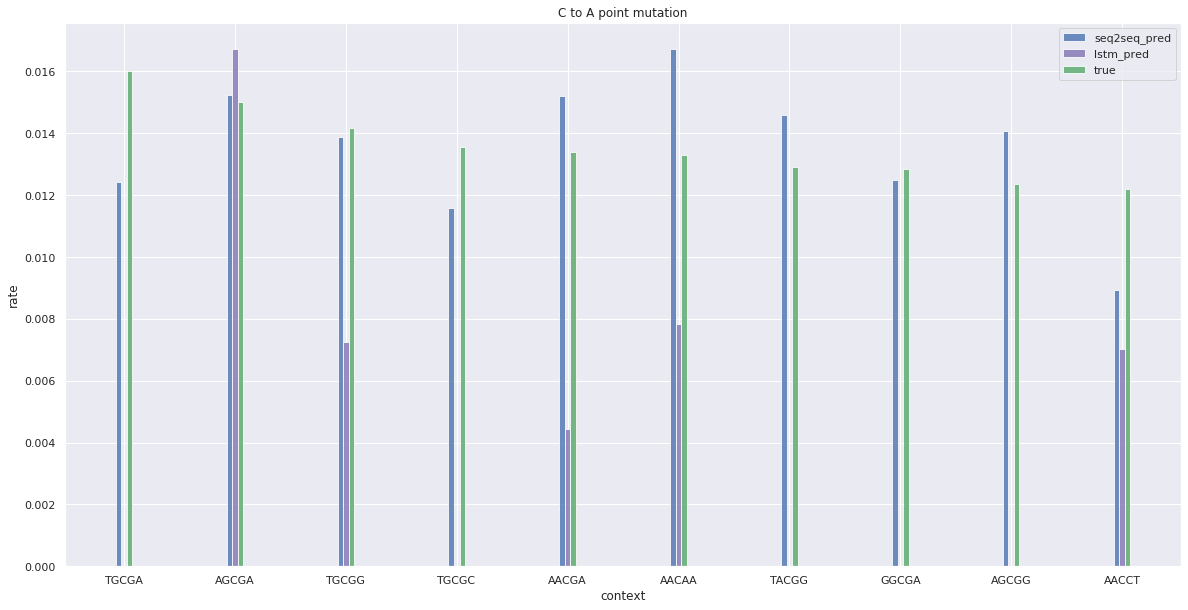

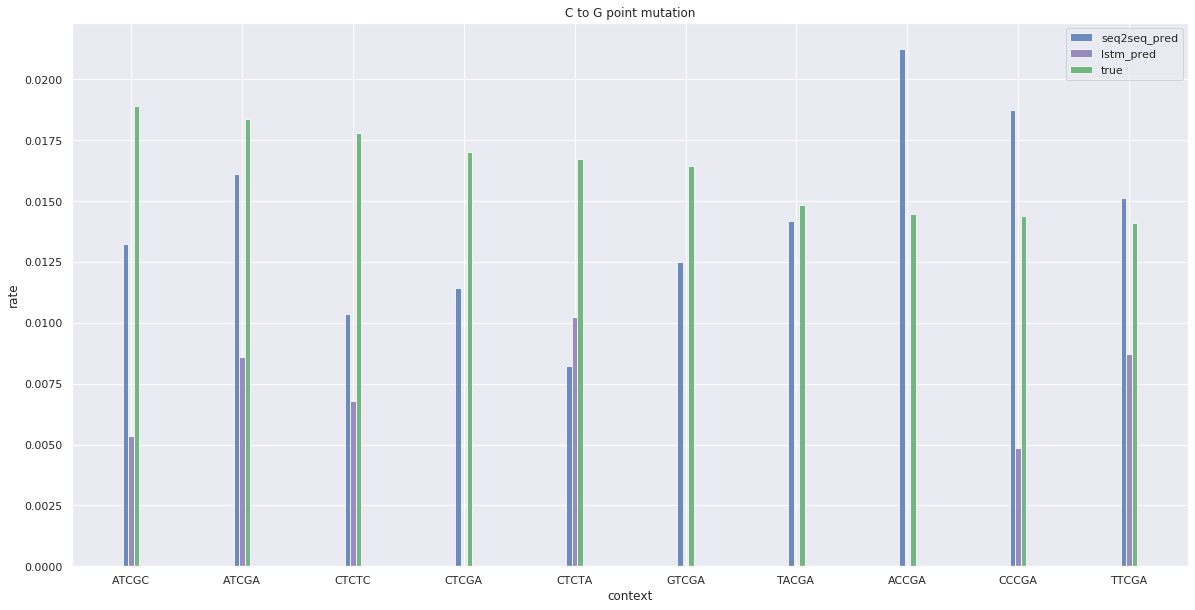

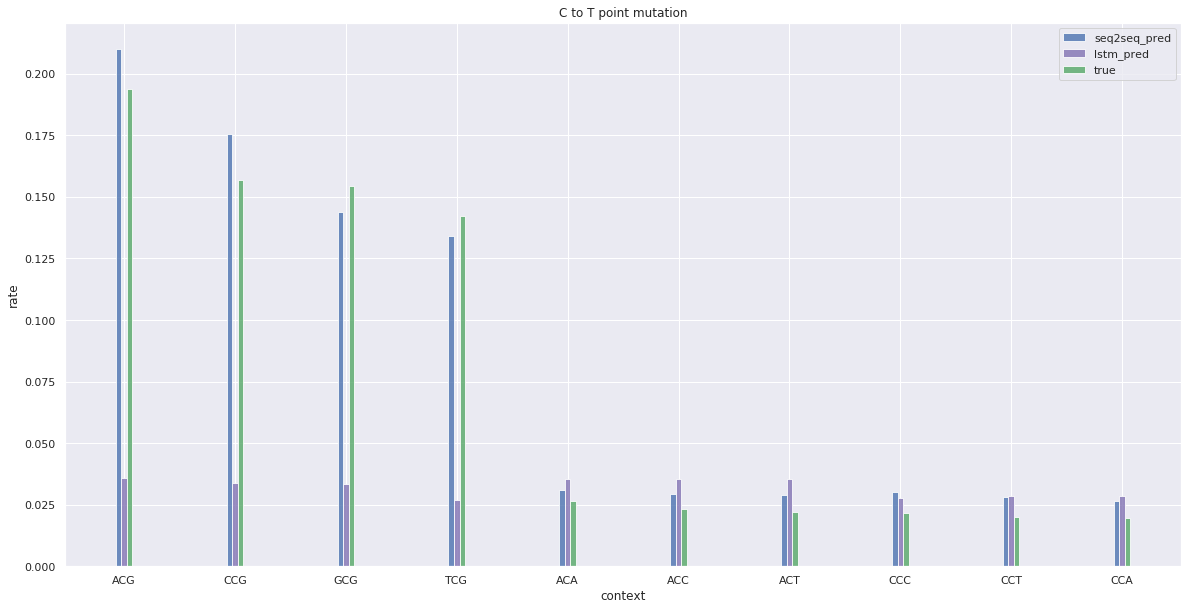

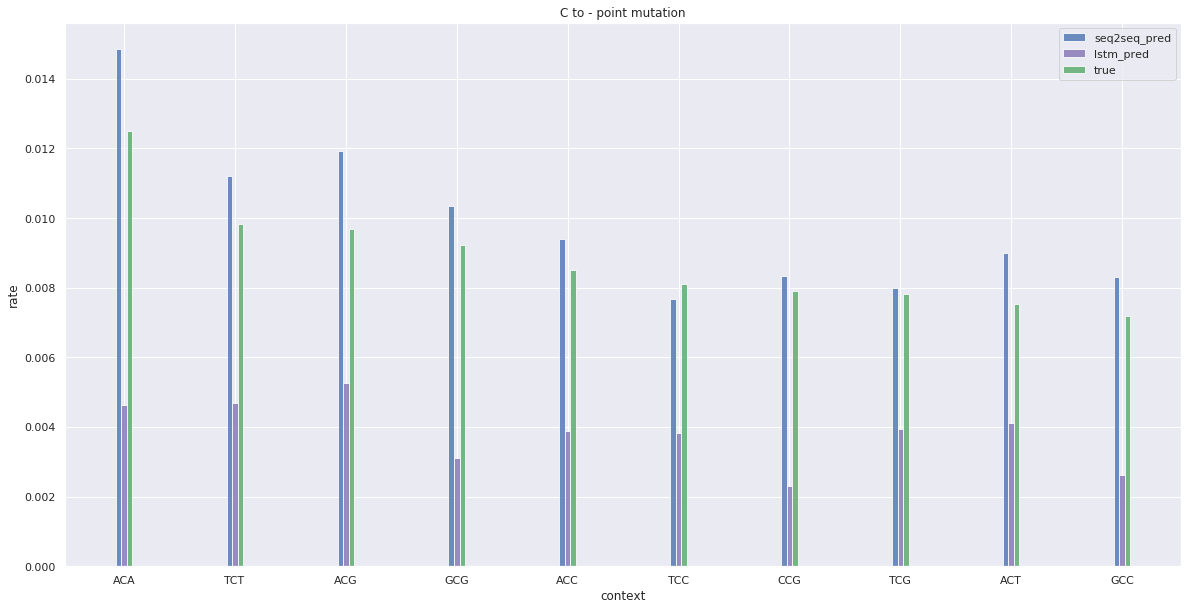

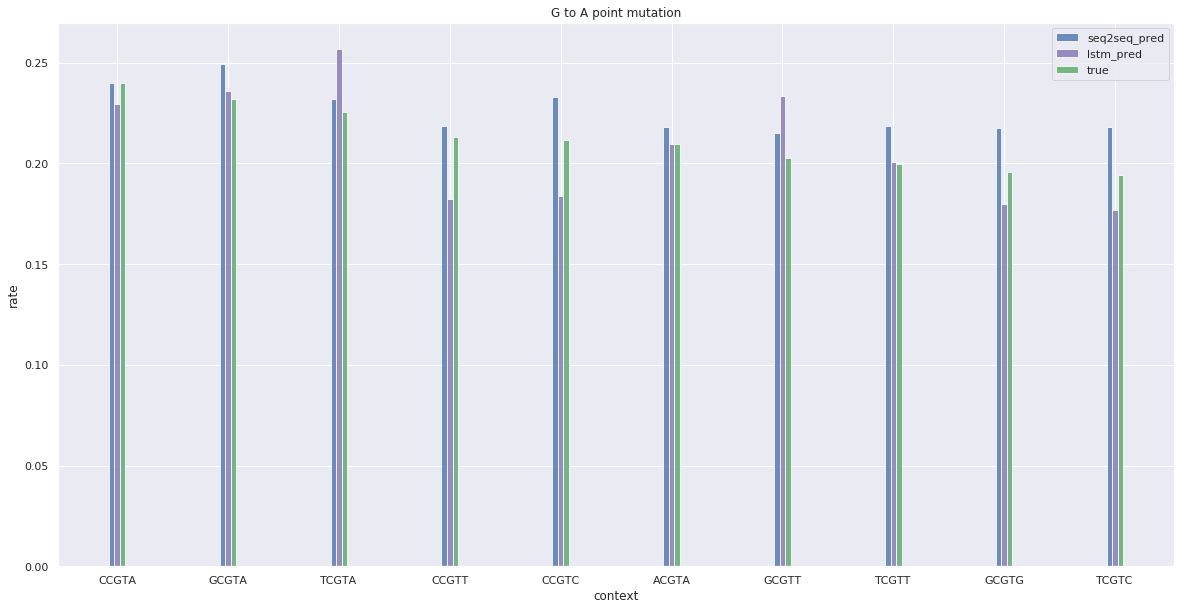

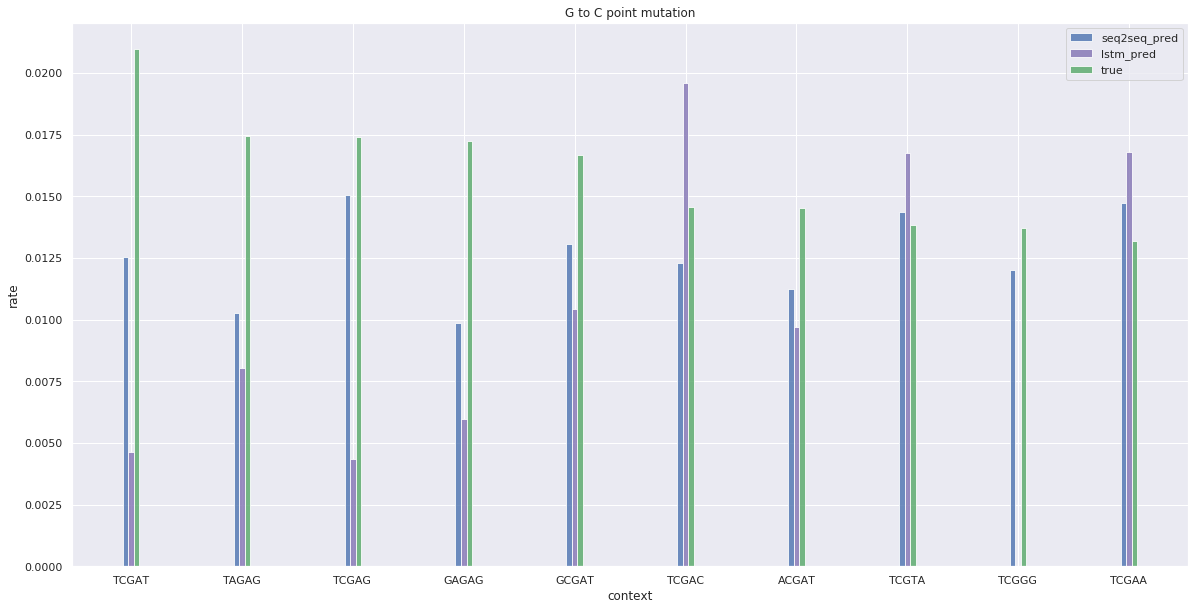

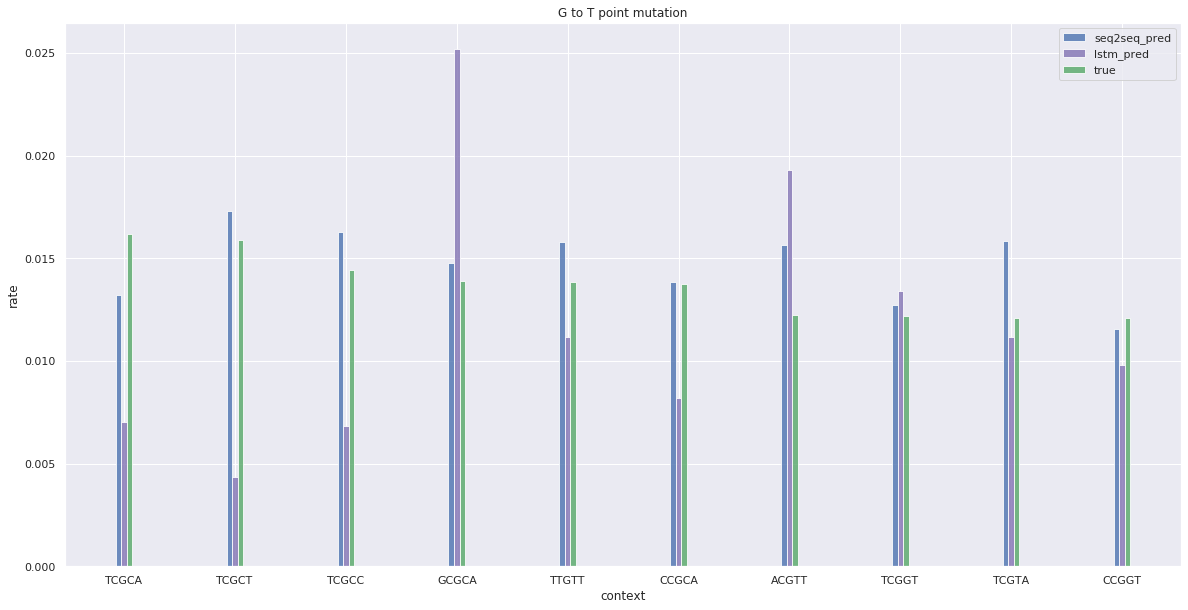

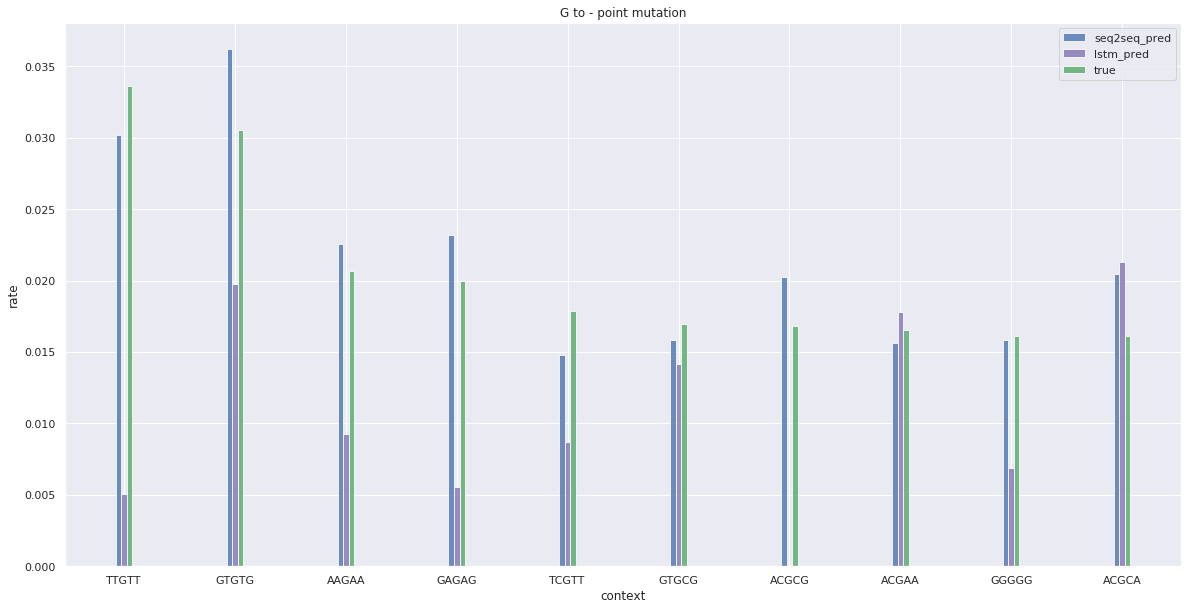

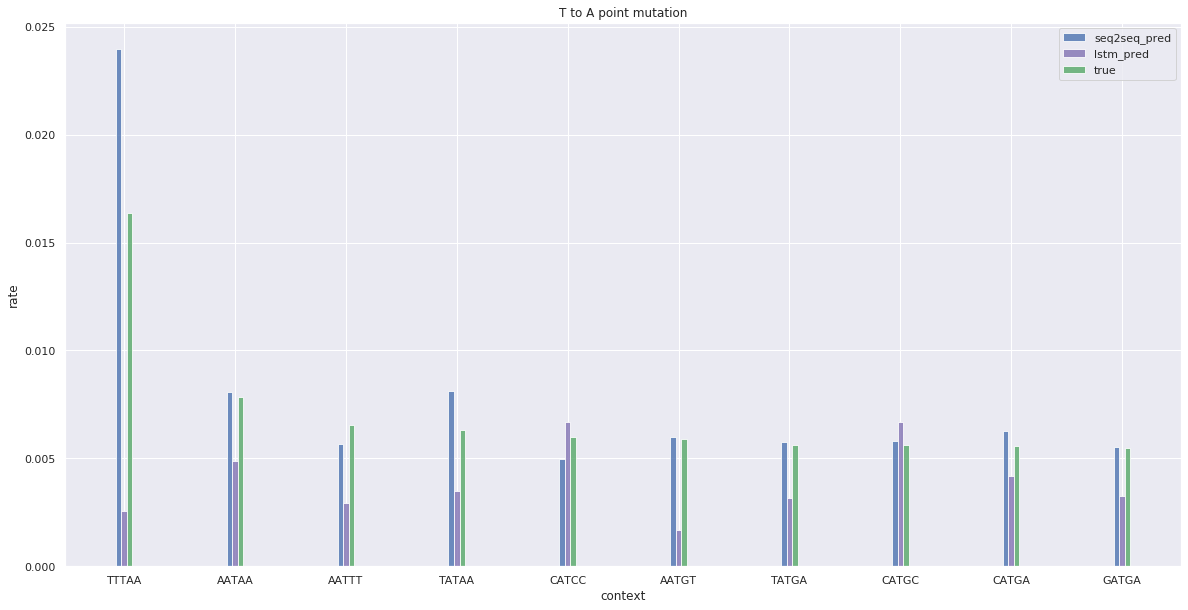

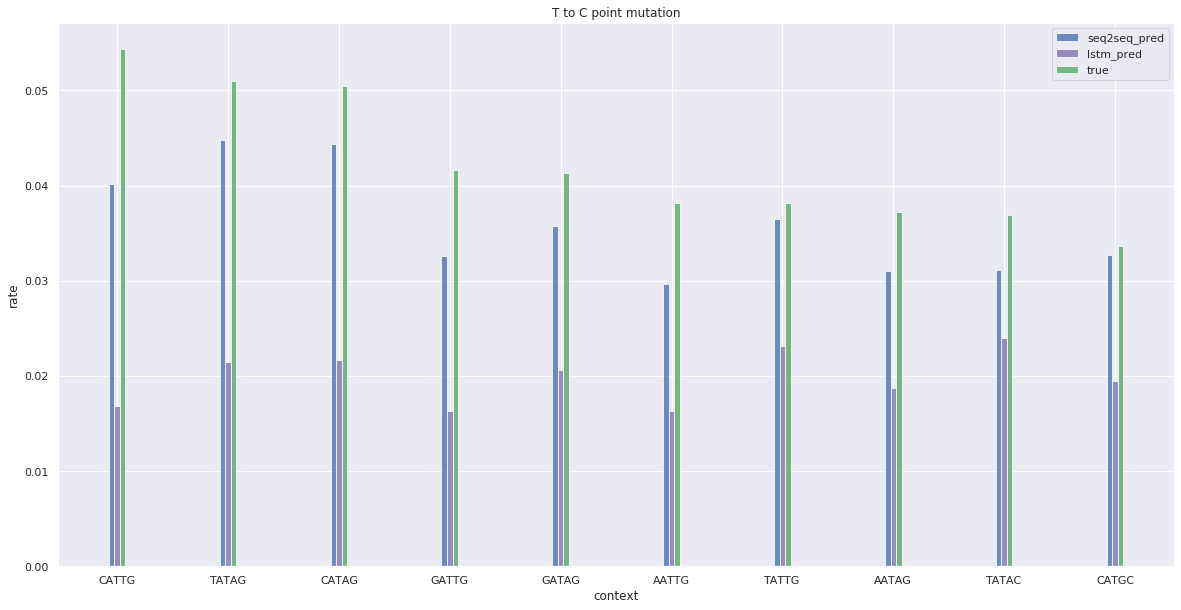

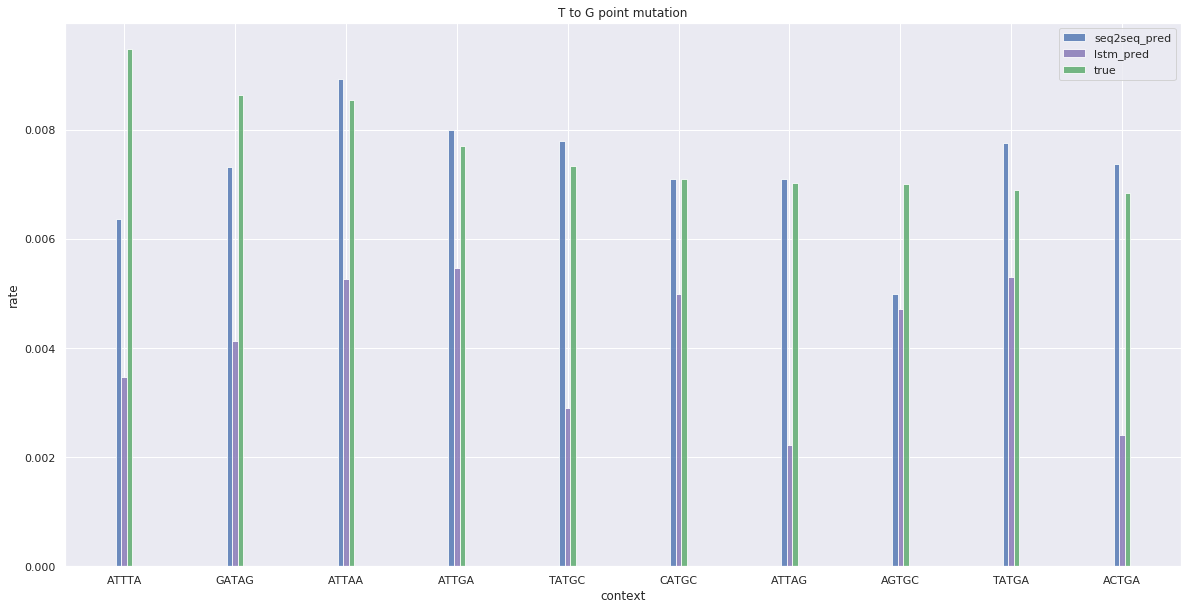

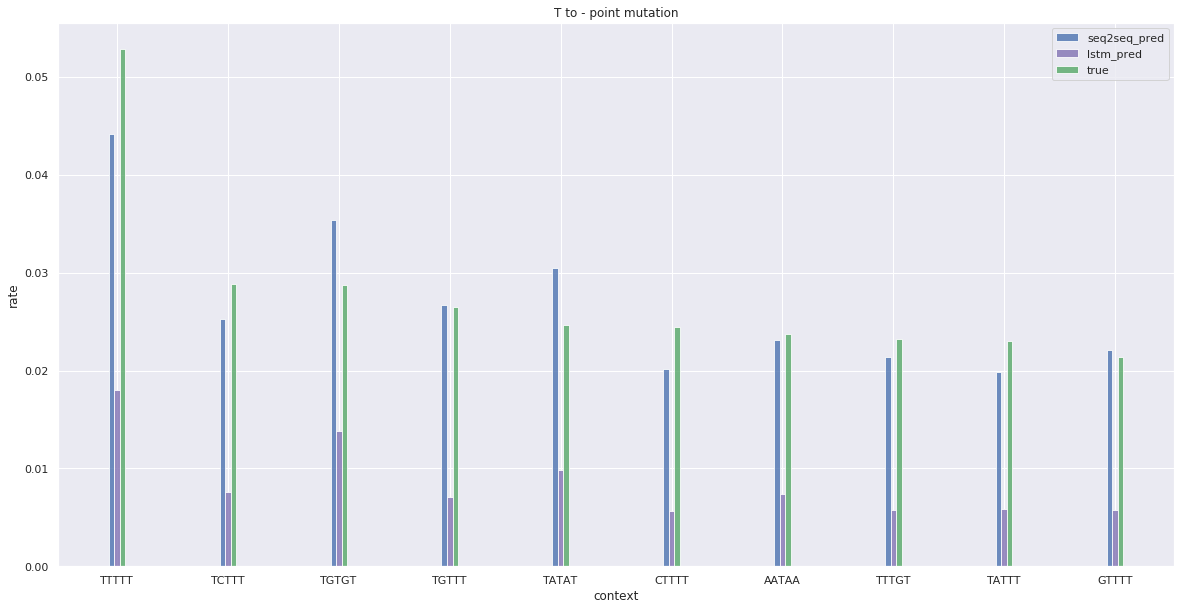

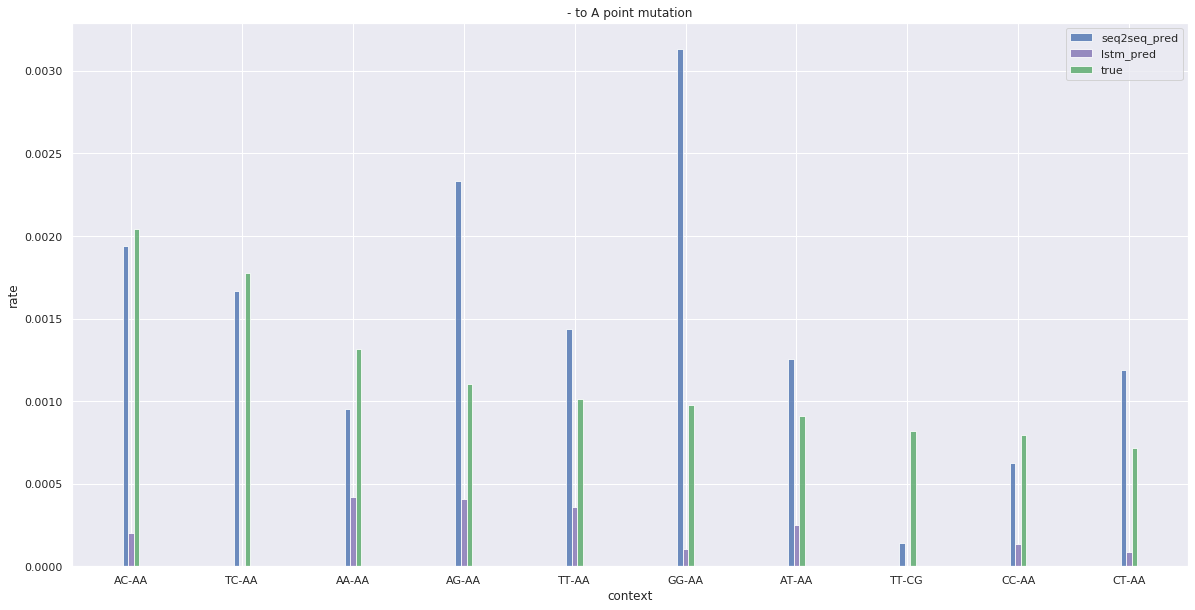

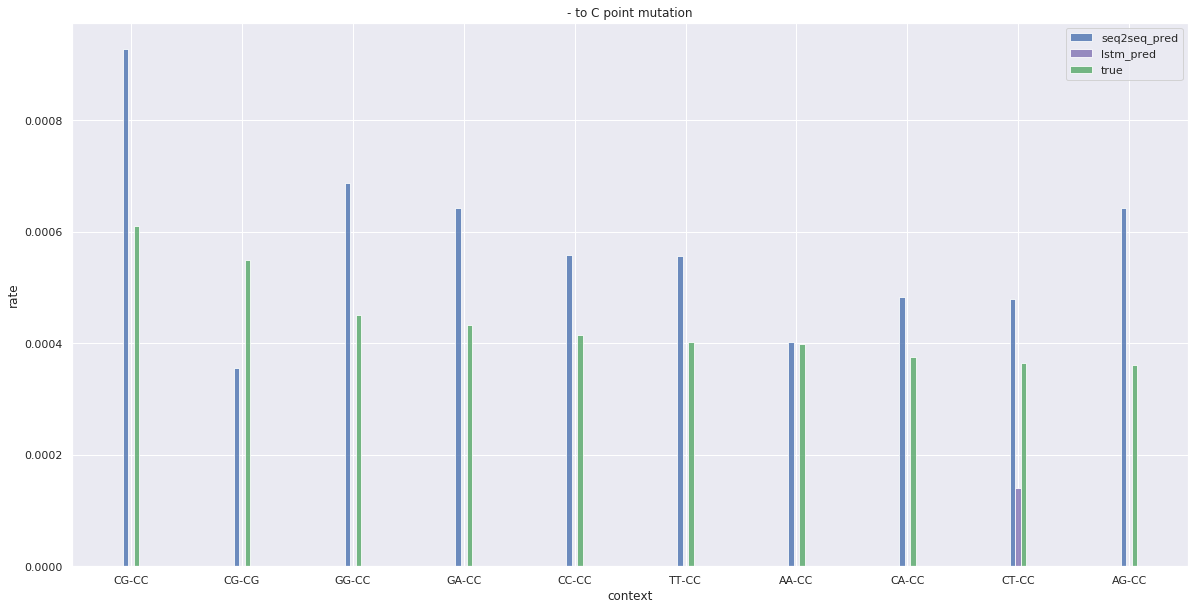

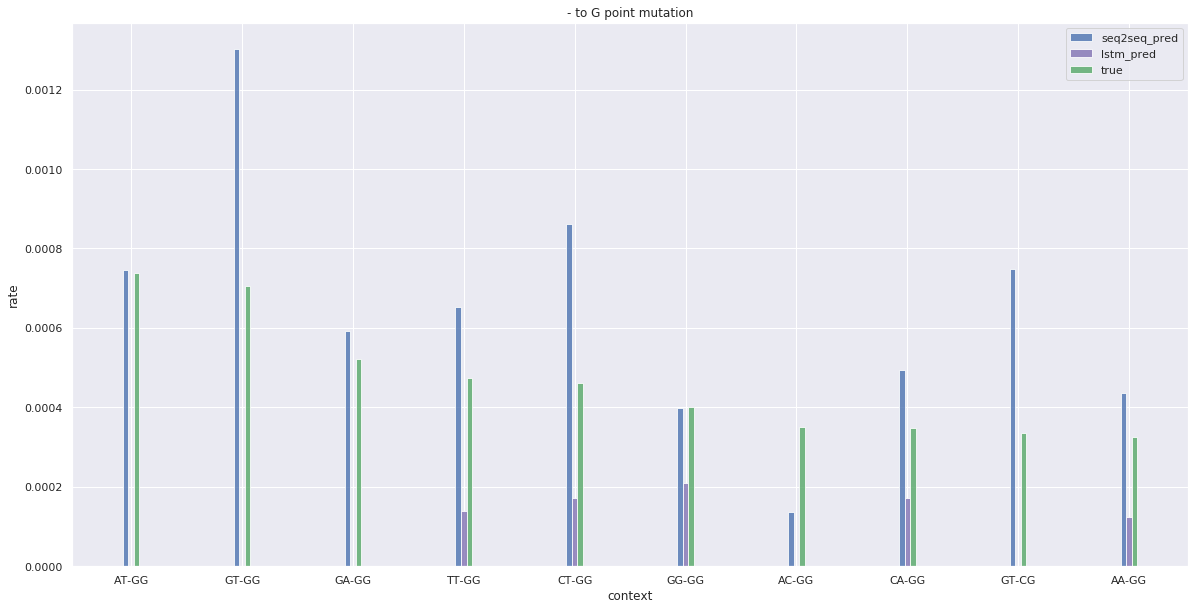

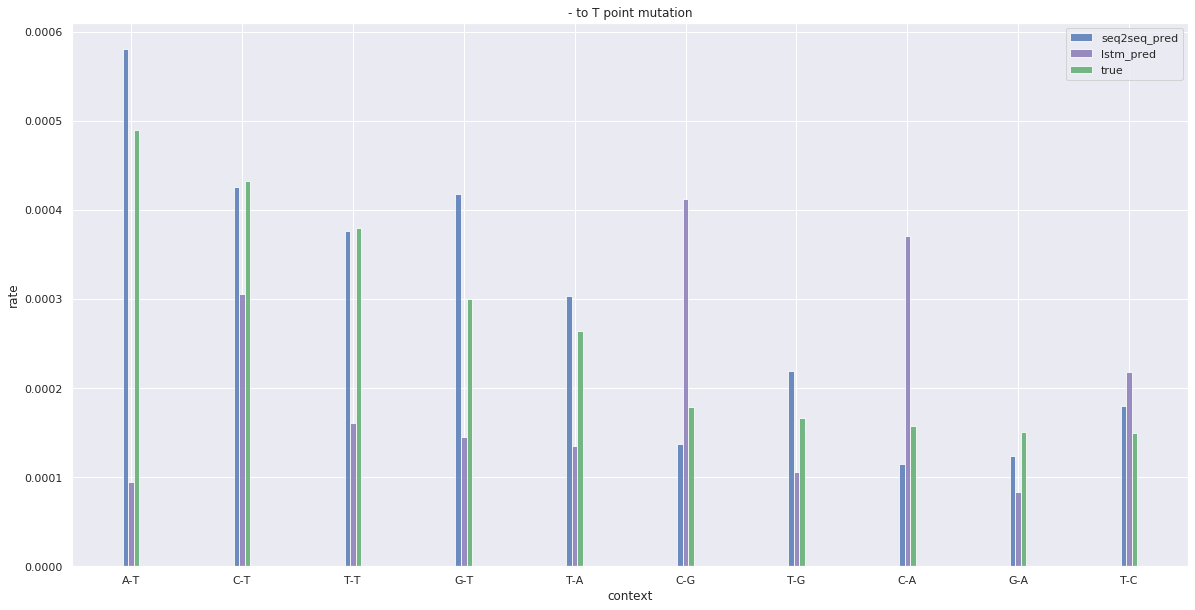

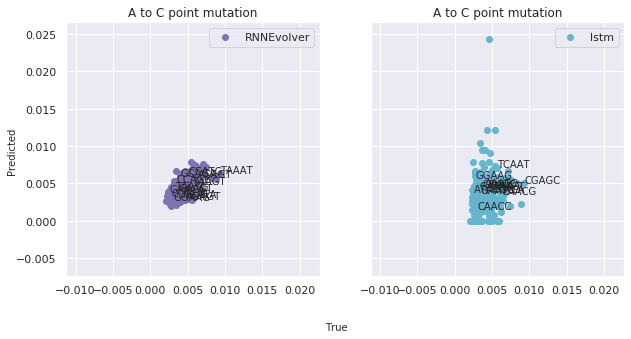

(0.6558833489600809, 7.218539114222167e-33) (0.16006058542058244, 0.010317736878787098)


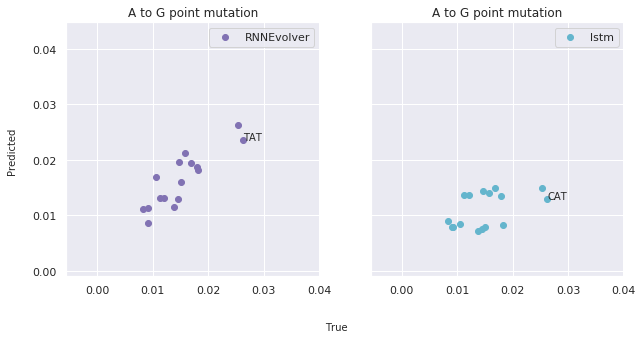

(0.8717969010093634, 1.0803977475498375e-05) (0.48650398777082543, 0.05601266210540413)


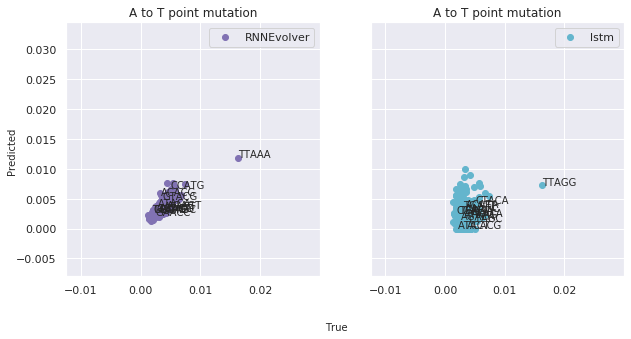

(0.8269635866930247, 1.8364872017943186e-65) (0.15819444069078661, 0.011254209974031398)


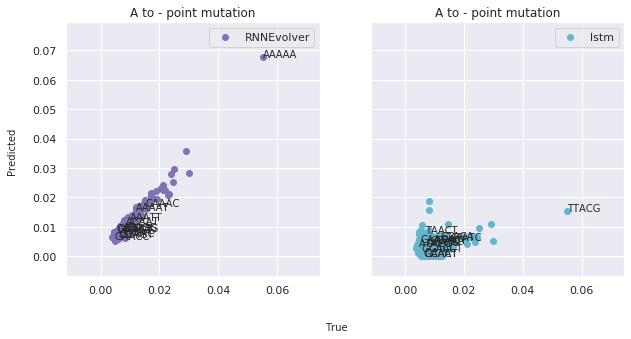

(0.9698058580474768, 1.1330800918999611e-157) (0.39639178550891047, 4.614548442331954e-11)


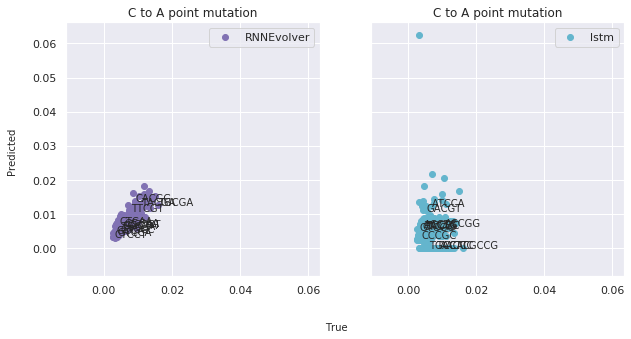

(0.8596765527561587, 4.658612409933458e-76) (-0.07681721875126693, 0.22062371863833694)


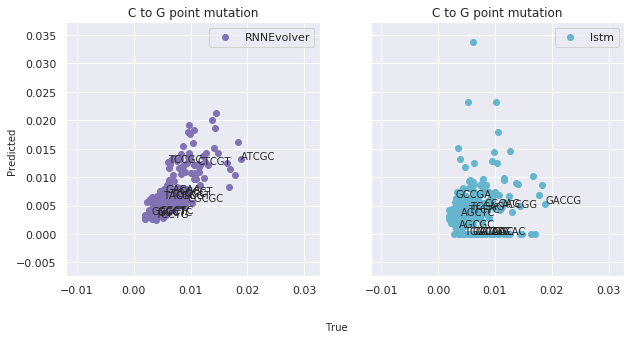

(0.7589922304448363, 3.04845132729678e-49) (0.11470236948218285, 0.06690545473000417)


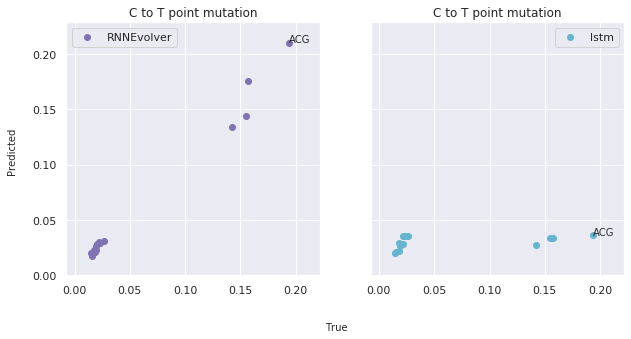

(0.9936915473908066, 1.0485672571920388e-14) (0.43441012079187225, 0.09268945077398794)


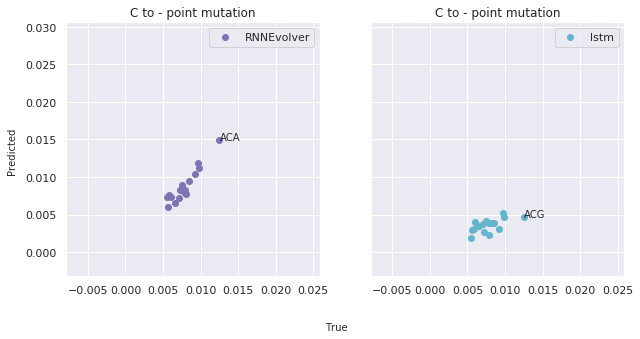

(0.9369098035734125, 9.020253982585117e-08) (0.6274163773065755, 0.009275322794549715)


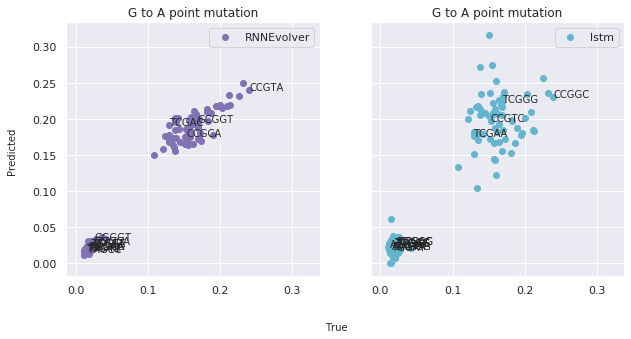

(0.9904776635402517, 9.358879226459255e-221) (0.954313545201064, 2.9411319380182325e-135)


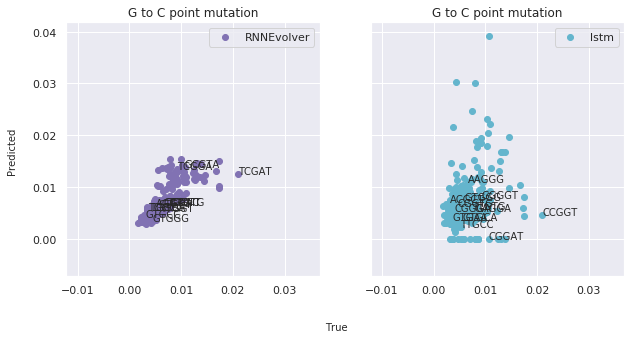

(0.7769264789393702, 5.868524423057783e-53) (0.27516458124163656, 7.909076492585683e-06)


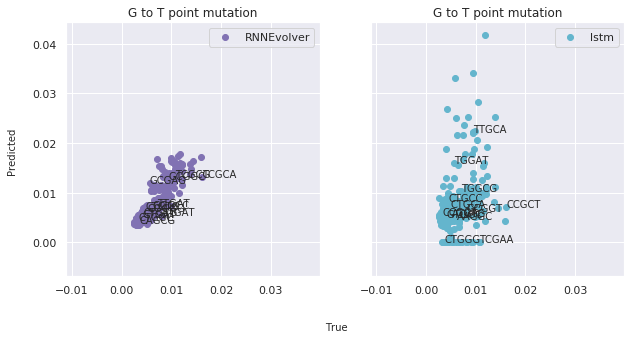

(0.8724584826106687, 5.914526190465717e-81) (0.3616168037820744, 2.514977931518752e-09)


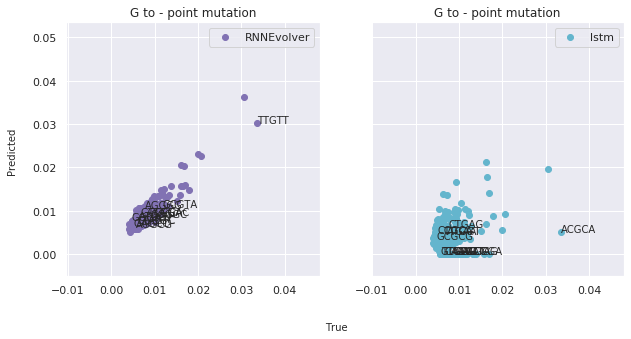

(0.916523007887494, 4.517469071035549e-103) (0.26480317604163733, 1.7627627197881504e-05)


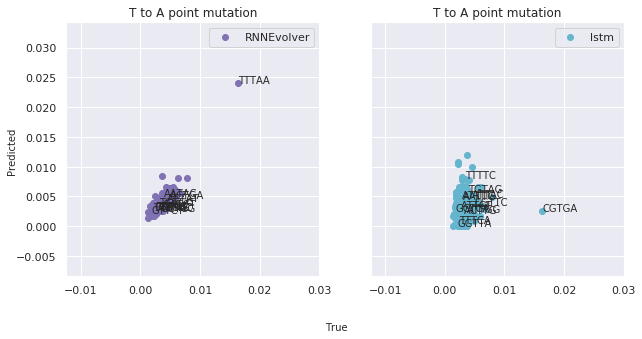

(0.8784825616947383, 1.8944164863943525e-83) (0.14349702039937196, 0.021640761062897307)


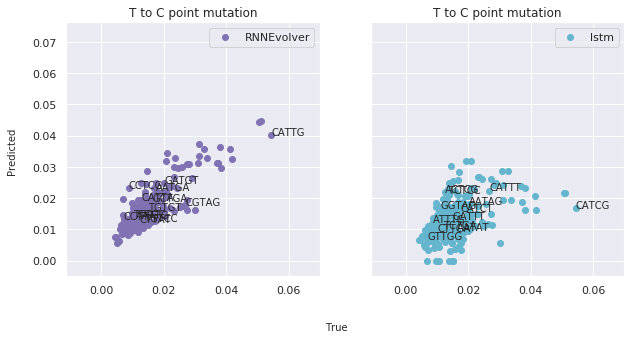

(0.8496731834597155, 1.4924107893887628e-72) (0.5012925679970484, 1.0754924091472479e-17)


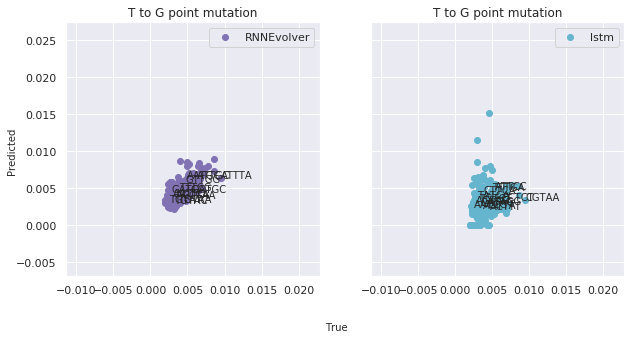

(0.709153809483478, 1.9731000037782926e-40) (0.19102425190286973, 0.002142395329458748)


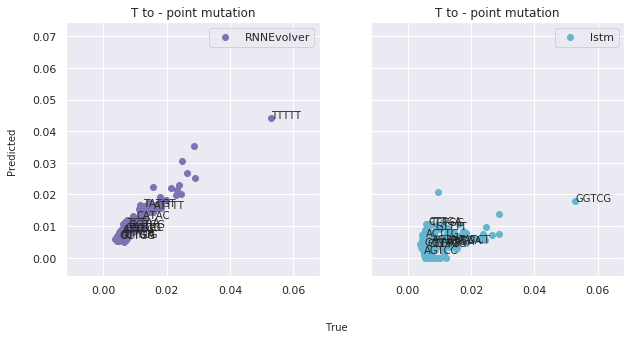

(0.9495560794642559, 6.308848074094033e-130) (0.4199324960541214, 2.3339642176102167e-12)


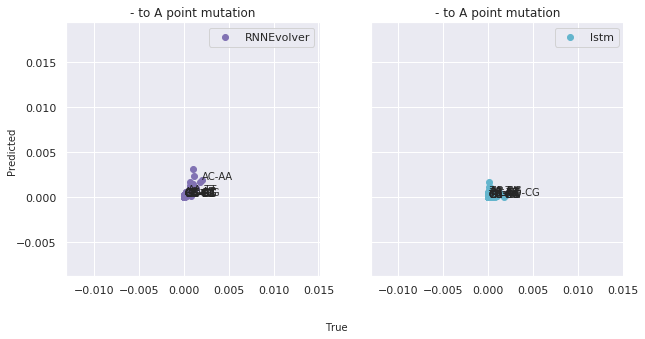

(0.8318725831225148, 6.638655759337065e-67) (0.07621759688882515, 0.22425850391995425)


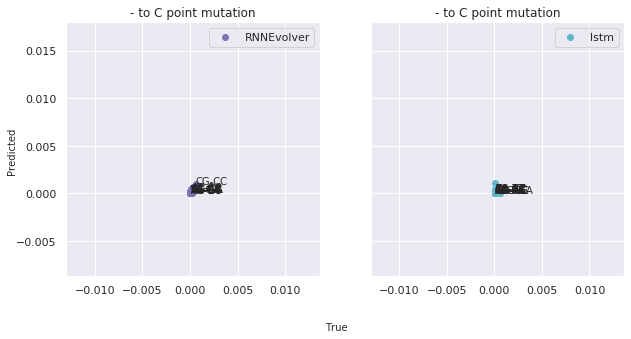

(0.8563858552654496, 7.091302533966189e-75) (-0.047091269216759234, 0.45314069381639144)


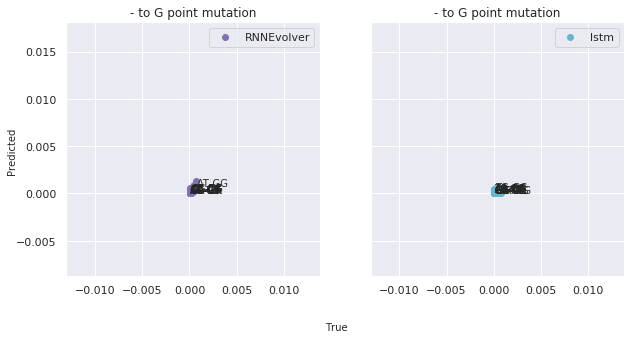

(0.8635712090219356, 1.6952275934051204e-77) (0.07383824046390566, 0.23910056002440977)


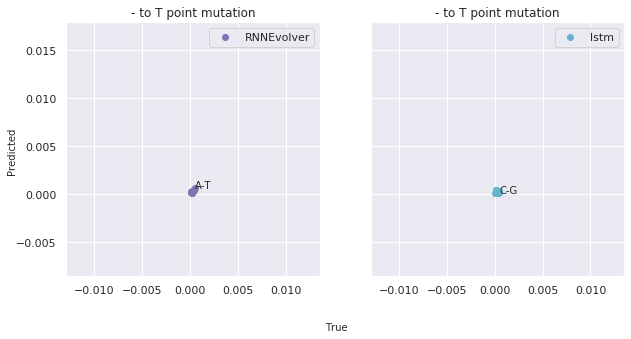

(0.9507532695841734, 1.6530023499886745e-08) (-0.026122563800377807, 0.9234969655708394)


In [5]:
# inputAll, inputAll2, predAll, outputAll= decodeList(inputAll, predAll, outputAll)
# lstm_inputAll, lstm_inputAll2, lstm_predAll, lstm_outputAll = decodeList(lstm_inputAll, lstm_predAll, lstm_outputAll)

ancCase = ['A','C','G','T']
desCase = ['A','C','G','T','-']
for i in tqdm_notebook(ancCase):
    for j in desCase:
        contextMut(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
        contextMut(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
        contextMut(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
ancCase = ['-']
desCase = ['A','C','G','T']
for i in tqdm_notebook(ancCase):
    for j in desCase:
        contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
        contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
        contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
        

    

ancCase = ['A','C','G','T','-']
desCase = ['A','C','G','T','-']
for i in ancCase:
    for j in desCase:
        if i != j:
            plotPointMut(numBin,i, j)



for i in ancCase:
    for j in desCase:
        if i != j:
            plotScatter(numBin,i, j)

In [ ]:
# contextLen = 3
# ancCase = ['A','C','G','T']
# desCase = ['A','C','G','T','-']
# for i in tqdm_notebook(ancCase):
#     for j in desCase:
#         contextMut(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
#         contextMut(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
#         contextMut(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
# ancCase = ['-']
# desCase = ['A','C','G','T','-']
# for i in tqdm_notebook(ancCase):
#     for j in desCase:
#         contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
#         contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
#         contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
# ancCase = ['A','C','G','T','-']
# desCase = ['A','C','G','T','-']
# for i in ancCase:
#     for j in desCase:
#         if i != j:
#             plotPointMut(numBin,i, j)
# for i in ancCase:
#     for j in desCase:
#         if i != j:
#             plotScatter(numBin,i, j)

In [ ]:
def analyzeMut(ancNuc, desNuc):
    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
#     evolSeq = np.load('data/true_evol_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()
    lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc, ancName), allow_pickle = True).item()

#     print(list(predSeq.keys())[:256])
#     print(list(trueSeq.keys())[:256])
    print(predSeq)
#     print(trueSeq)
    
analyzeMut('A','G')

In [ ]:
contextLength = 1
numBin = 16
            
def calculateR(contextLen, ancCase, desCase):
    sorted_context = contextMut(contextLen, ancCase, desCase, inputAll, predAll, pred = True, evol = False)
    contextMut(contextLen, ancCase, desCase, inputAll, outputAll, pred = False, evol = False)
    contextMut(contextLen, ancCase, desCase, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)

    sorted_word = list(sorted_context.keys())
    top = sorted_word[0]
    mid = sorted_word[int(len(sorted_word)/2)]
    bot = sorted_word[-1]
    return top, mid, bot

def calculateRInsert(contextLen, ancCase, desCase):
    sorted_context = contextMutInsert(contextLen, ancCase, desCase, inputAll, predAll, pred = True, evol = False)
    contextMutInsert(contextLen, ancCase, desCase, inputAll, outputAll, pred = False, evol = False)
    contextMutInsert(contextLen, ancCase, desCase, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)

    sorted_word = list(sorted_context.keys())
    top = sorted_word[0]
    mid = sorted_word[int(len(sorted_word)/2)]
    bot = sorted_word[-1]
    return top, mid, bot
    
def plotContextChange(contLen, ancCase, desCase, insert = False):
    contextLen = contLen
    if insert == True:
        top, mid, bot = calculateRInsert(contextLen, ancCase, desCase)
        
        tt, tm, tb = calculateRInsert(contextLen, top, desCase)
        mt, mm, mb = calculateRInsert(contextLen, mid, desCase)
        bt, bm, bb = calculateRInsert(contextLen, bot, desCase)

        ttt, ttm, ttb = calculateRInsert(contextLen, tt, desCase)
        mmt, mmm, mmb = calculateRInsert(contextLen, mm, desCase)
        bbt, bbm, bbb = calculateRInsert(contextLen, bb, desCase)
    else :
        top, mid, bot = calculateR(contextLen, ancCase, desCase)
        tt, tm, tb = calculateR(contextLen, top, desCase)
        mt, mm, mb = calculateR(contextLen, mid, desCase)
        bt, bm, bb = calculateR(contextLen, bot, desCase)

        ttt, ttm, ttb = calculateR(contextLen, tt, desCase)
        mmt, mmm, mmb = calculateR(contextLen, mm, desCase)
        bbt, bbm, bbb = calculateR(contextLen, bb, desCase)
    
#     calculateR(contextLen, ttt, desCase)
#     calculateR(contextLen, mmm, desCase)
#     calculateR(contextLen, bbb, desCase)

    # for i in tqdm_notebook(ancCase):
    #     for j in desCase:
    #         contextMutInsert(contextLen, i, j, inputAll, predAll, pred = True, evol = False)
    #         contextMutInsert(contextLen, i, j, inputAll, outputAll, pred = False, evol = False)
    #         contextMutInsert(contextLen, i, j, lstm_inputAll, lstm_predAll, pred = True, evol = False, lstm = True)
    topList = [ancCase, top, tt]
    midList = [ancCase, mid, mm]
    botList = [ancCase, bot, bb]
    ancWords = [topList, midList, botList]
    
   #     lstmSeq = np.load('data/pred_lstm_context{}{}_{}.npy'.format(ancNuc,desNuc,ancName), allow_pickle = True).item()


    f, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,20))
    axs = axs.flatten()
    f.text(0.5, 0.1, 'True', ha='center', va='center')
    f.text(0.05, 0.5, 'Predicted', ha='center', va='center', rotation='vertical')

    index = 0
    for words in tqdm(ancWords):
        for j in desCase:
            for n, i in enumerate(words):
                if i != j:
                    predSeq = np.load('data/pred_context{}{}_{}.npy'.format(i,j,ancName), allow_pickle = True).item()
                    trueSeq = np.load('data/true_context{}{}_{}.npy'.format(i,j,ancName), allow_pickle = True).item()
                    true = list(trueSeq.values())
                    true_context = list(trueSeq.keys())
                    pred = []
                    for x in true_context:
                        pred.append(predSeq[x])
                    axs[index].scatter(true, pred, color = 'm')
                    axs[index].axis('scaled')
                    axs[index].axis('square')
                    axs[index].set_title('x{}y to {} point mutation'.format(i, j))
                    for i, txt in enumerate(list(trueSeq.keys())):
                        if i %2 ==0:
                            axs[index].annotate(txt, (true[i], pred[i]))

                    index += 1
                    print('pearson corr: ', stats.pearsonr(pred, true)[0])
    plt.show()
    plt.close()
#                     plotPointMut(numBin,i, j)
#                     plotScatter(numBin,i, j)
#     analyzeMut(ancCase[0],desCase[0])

In [ ]:
plotContextChange(1, 'A', 'G', insert = False)
plotContextChange(1, 'C', 'T', insert = False)
plotContextChange(1, 'C', '-', insert = False)
plotContextChange(1, '-', 'T', insert = True)

In [ ]:
analyzeMut('TAG','G')
contextMut(contextLen, 'TAG', 'G', inputAll, predAll, pred = True, evol = False)